In [ ]:
# Model architecture->compile->fit->evaluate

In [19]:
import keras
from keras import utils #---- used to convert to categorical data--one hot encoding
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D ##-- convolution layers which takes images as input
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time



In [20]:
# the data, split between train and test sets
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
img_rows, img_cols = 28,28

In [23]:
# formatting the image 

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [26]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize
x_train /= 255
x_test /= 255


In [27]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [28]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [29]:
# convert class labels to binary class vector

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
# model Parameters

batch_size = 128
epochs = 12

In [ ]:
'''Conv2D class
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)'''

In [32]:
# Model Architecture

model= Sequential()
model.add(Conv2D(32,kernel_size = (3*3),activation = 'relu',input_shape = input_shape))
model.add(Conv2D(64,kernel_size = (3*3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2*2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'softmax'))


In [33]:
# Compile + fit

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train,y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test,y_test),verbose = 1)

Epoch 1/12
469/469 [==============================] - 10s 7ms/step - loss: 0.5335 - accuracy: 0.8228 - val_loss: 0.0484 - val_accuracy: 0.9853
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.0325 - val_accuracy: 0.9893
Epoch 3/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.0293 - val_accuracy: 0.9905
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0232 - val_accuracy: 0.9921
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0364 - accuracy: 0.9884 - val_loss: 0.0244 - val_accuracy: 0.9922
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.0210 - val_accuracy: 0.9927
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0199 - val_accuracy: 0.9930
Epoch

In [34]:
# Evaluate

score = model.evaluate(x_test,y_test)
print('Test loss:',score[0])
print('Test Accuracy:',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.9944
Test loss: 0.019360879436135292
Test Accuracy: 0.9944000244140625


In [35]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

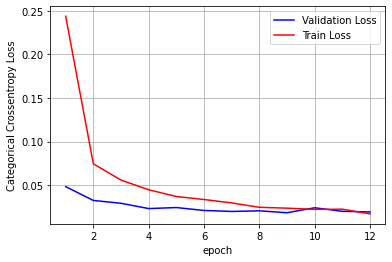

In [36]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

In [38]:
history.history

{'accuracy': [0.9228500127792358,
  0.9767666459083557,
  0.9826666712760925,
  0.9860000014305115,
  0.988349974155426,
  0.9890833497047424,
  0.9901999831199646,
  0.9918500185012817,
  0.9925166964530945,
  0.9930333495140076,
  0.9924833178520203,
  0.994533360004425],
 'loss': [0.24368764460086823,
  0.0745021179318428,
  0.05583944171667099,
  0.04477834701538086,
  0.037062011659145355,
  0.03360709175467491,
  0.029687274247407913,
  0.024680832400918007,
  0.02367233671247959,
  0.022286780178546906,
  0.022518053650856018,
  0.01708851382136345],
 'val_accuracy': [0.9853000044822693,
  0.989300012588501,
  0.9904999732971191,
  0.9921000003814697,
  0.9922000169754028,
  0.9926999807357788,
  0.9929999709129333,
  0.9923999905586243,
  0.9937999844551086,
  0.9915000200271606,
  0.9937000274658203,
  0.9944000244140625],
 'val_loss': [0.048351582139730453,
  0.03251569718122482,
  0.029289886355400085,
  0.02321610599756241,
  0.024388620629906654,
  0.02104227989912033,
  0